In [43]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [18]:
importlib.reload(NN)

<module 'NN' from '/home/bouissob/Code/NN.py'>

In [19]:
#def __init__(self, Epoch = 2, Neur_seq = '32/64/64/32', Dataset_train = ['Ocean1'], Oc_mod_type = 'COM_NEMO-CNRS', 
#             Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], Var_Y = 'meltRate'):

In [20]:
#Test = NN.model_NN(Epoch = 1, Neur_seq = '4_2')
#Test.train()

In [4]:
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']

In [22]:
Training = NN.Sequencial_training(NN.model_NN, Epoch = 4)


In [24]:
Training.Neur_seq_preview(0)

[]

In [ ]:
Tot = Training.training(3, verbose = 0, batch_size = 64, Dataset_train = OcT)

In [ ]:
pwd = os.getcwd()
Ocean_mod = 'Ocean1'
Type = 'COM_NEMO-CNRS'
Models_path = os.path.join(pwd, 'Auto_model', Type, Ocean_mod)
li = glob.glob(Models_path + '/Ep_14*')

In [ ]:
Test = li[len(li) - 1]
MeanX, StdX = pd.read_pickle(Test + '/MeanX.pkl'), pd.read_pickle(Test + '/StdX.pkl')
MeanY, StdY = np.loadtxt(Test + '/MeanY.csv'), np.loadtxt(Test + '/StdY.csv')
model = tf.keras.models.load_model(Test + '/model.h5')

In [ ]:
model.count_params()

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_14


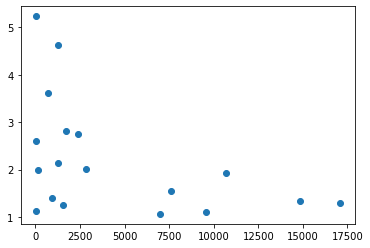

In [54]:
#def Compute_data_for_plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO-CNRS', 
#             Ocean_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS', message = 1):
importlib.reload(NN)
Rm, Param, Neur = NN.Plot_RMSE_to_param(Epoch = 14, Ocean_trained = 'Ocean1', message = 0)

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_4


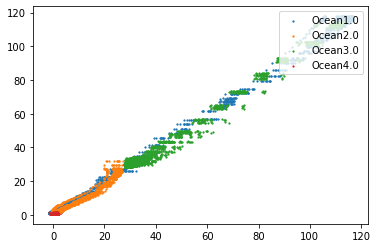

In [56]:
importlib.reload(NN)
RMSEs, Params, Melts, Modded_melts, Neurs, Oc = NN.Plot_Melt_to_Modded_melt(Epoch = 4, 
                                Ocean_trained = OcT, message = 0, Ocean_target = OcT)

In [38]:
np.unique(Oc)

array([1., 2.])

In [47]:
len(Oc)

60720

In [49]:
len(Melts)

5280

In [ ]:
Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]